In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
# import scvi

In [2]:
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds')
sc.logging.print_header()

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)
2021-11-28 23:42:23.561302: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-28 23:42:23.561362: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.8.0 anndata==0.7.6 umap==0.5.1 numpy==1.19.2 scipy==1.6.2 pandas==1.3.3 scikit-learn==0.23.2 statsmodels==0.11.1 python-igraph==0.8.3 leidenalg==0.8.3 pynndescent==0.5.5


In [3]:
fischer = sc.read('/storage/groups/ml01/datasets/projects/20201130_Schober_TcellReversePhenotyping_meshal.ansari/201209_TcellReversePT_integrated.h5ad')
fischer.obs['cell_type'] = ['('.join(s.split('(')[:-1])[:-1] for s in fischer.obs['harmonized_celltype'].values]
fischer = fischer[fischer.obs.cell_type.isin(['Ciliated', 'Ciliated diff.', 'Basal', 'Ionocytes', 'Squamous epithelial', 'Secretory', 'AT2, AT1 cells'])]
fischer

View of AnnData object with n_obs × n_vars = 62326 × 46190
    obs: 'patients', 'sample_ID', 'data_set', 'severity', 'location', 'condition', 'age', 'sex', 'virus_positive', 'PBMC_leiden_29', 'patient_category', 'reactive_clonotype', 'published_meta_celltype', 'published_celltype', 'harmonized_celltype', 'T_cell_type', 'size_factors', 'pct_mitochondrial', 'n_counts', 'n_genes', 'cell_type'
    var: 'highly_variable'
    uns: 'PBMC_leiden_29_colors', 'T_cell_type_colors', 'condition_colors', 'data_set_colors', 'harmonized_celltype_colors', 'leiden_colors', 'location_colors', 'name_colors', 'neighbors', 'patient_category_colors', 'patient_colors', 'patients_colors', 'pca', 'published_celltype_colors', 'reactive_colors', 'sample_colors', 'second_harmonized_colors', 'severity_TA_colors', 'severity_colors', 'severity_condition_colors', 'umap', 'virus_positive_colors'
    obsm: 'X_clonotype_network', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'connect

In [22]:
# using the original data bc the values are different in the scvi batch corrected one
adata = sc.read('/storage/groups/ml01/workspace/yuge.ji/covid-perturbation/data/210118_annot_patient_all.h5ad')

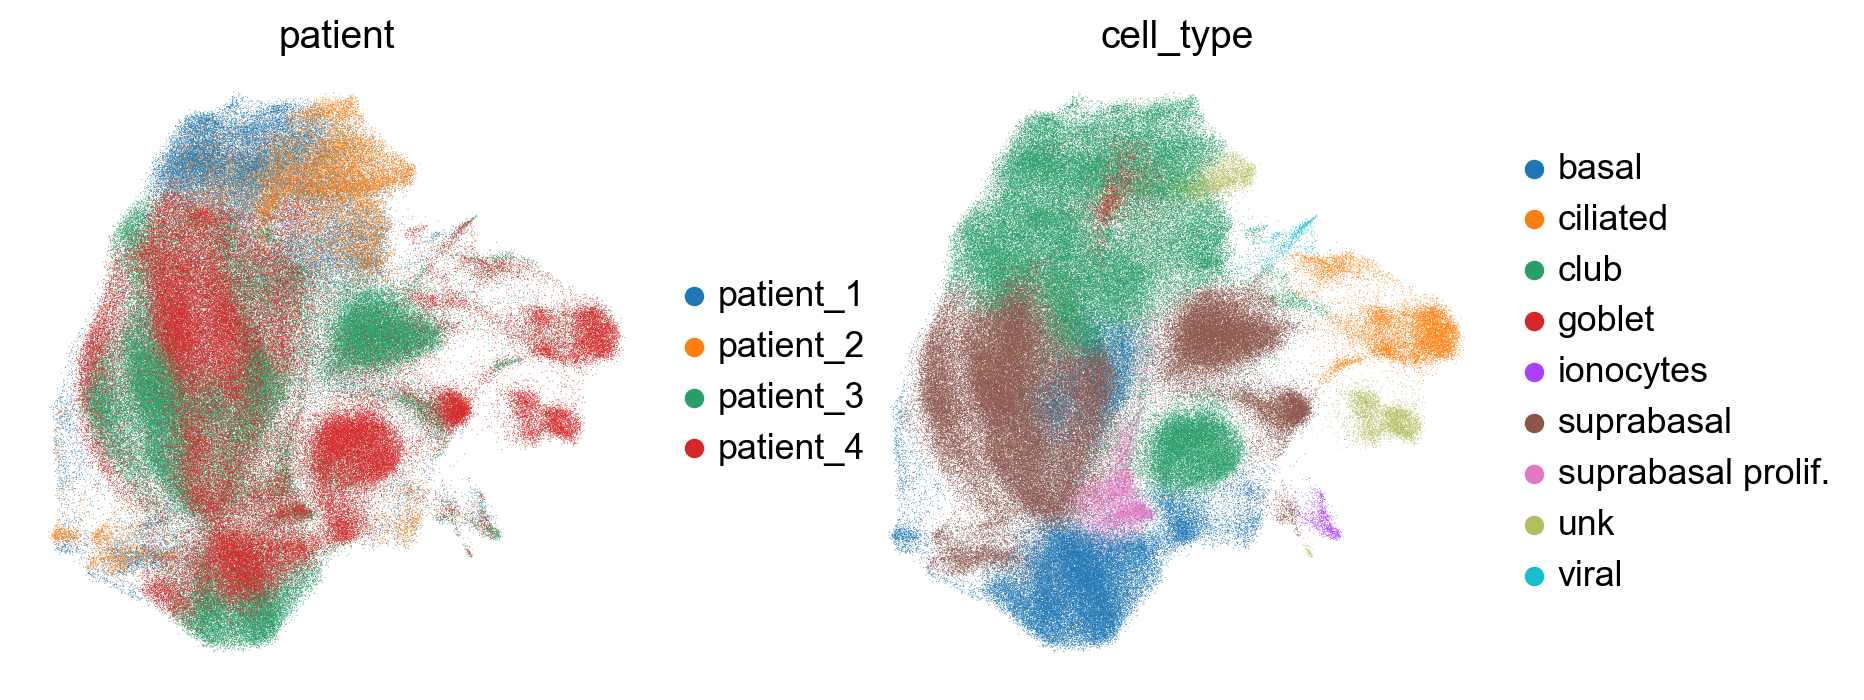

In [5]:
# sc.pl.umap(adata, color=['patient', 'cell_type'])

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/anndata/_core/anndata.py:1229: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'cell_type' as categorical


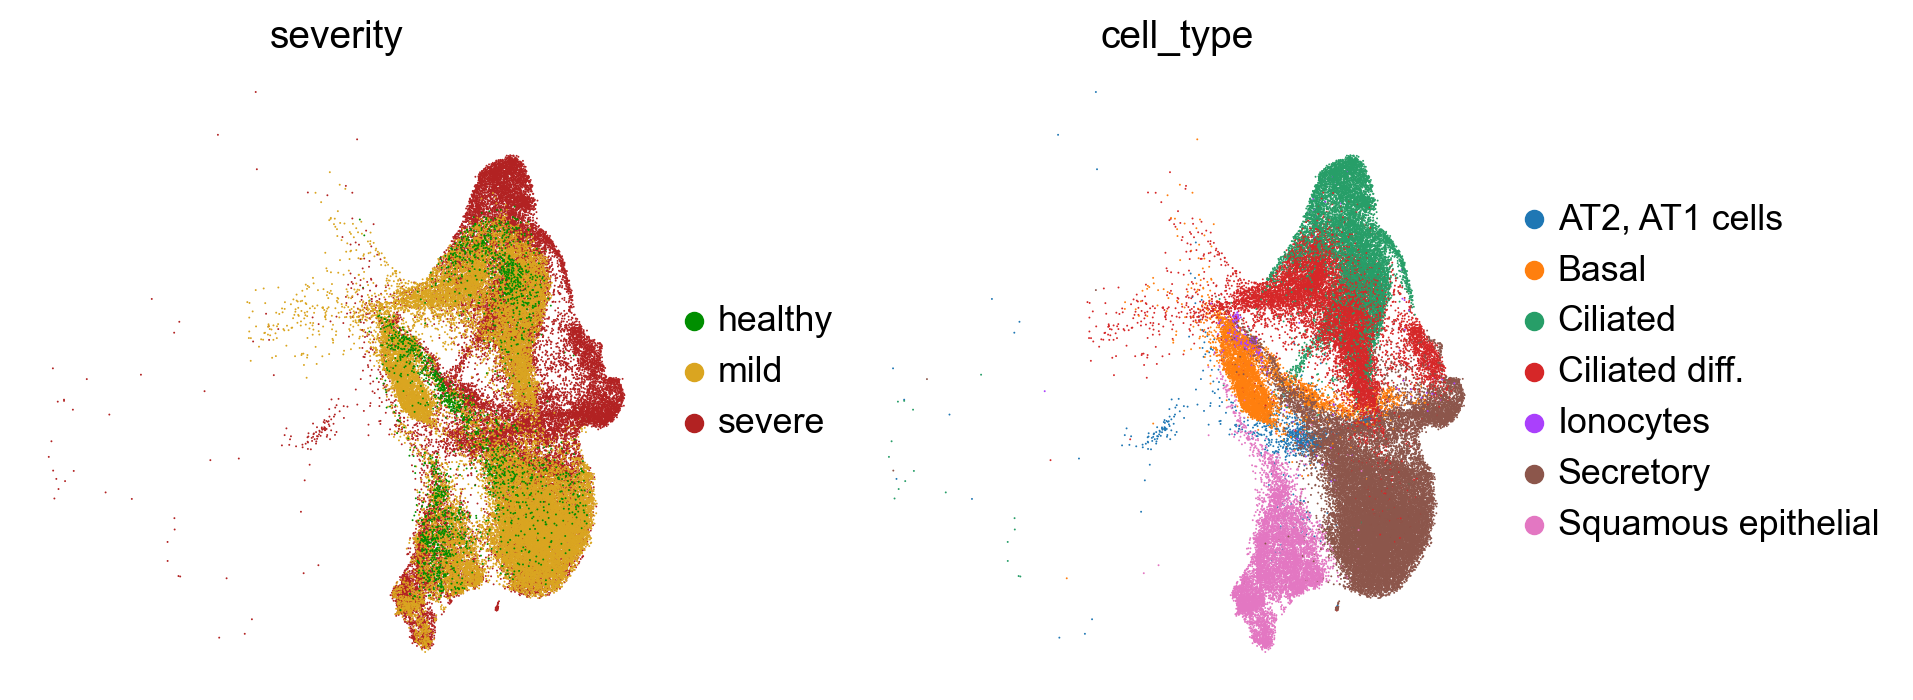

In [6]:
sc.pl.umap(fischer, color=['severity', 'cell_type'])

Match `var_names` and cell types for `ingest`.

In [31]:
fischer.obs['cell_type'] = [s.lower() for s in fischer.obs['cell_type']]

Trying to set attribute `.obs` of view, copying.


In [32]:
var_names = fischer.var_names.intersection(adata.var_names)
fischer = fischer[:, var_names]
adata = adata[:, var_names]

In [19]:
fischer

View of AnnData object with n_obs × n_vars = 62326 × 18023
    obs: 'patients', 'sample_ID', 'data_set', 'severity', 'location', 'condition', 'age', 'sex', 'virus_positive', 'PBMC_leiden_29', 'patient_category', 'reactive_clonotype', 'published_meta_celltype', 'published_celltype', 'harmonized_celltype', 'T_cell_type', 'size_factors', 'pct_mitochondrial', 'n_counts', 'n_genes', 'cell_type'
    var: 'highly_variable'
    uns: 'PBMC_leiden_29_colors', 'T_cell_type_colors', 'condition_colors', 'data_set_colors', 'harmonized_celltype_colors', 'leiden_colors', 'location_colors', 'name_colors', 'neighbors', 'patient_category_colors', 'patient_colors', 'patients_colors', 'pca', 'published_celltype_colors', 'reactive_colors', 'sample_colors', 'second_harmonized_colors', 'severity_TA_colors', 'severity_colors', 'severity_condition_colors', 'umap', 'virus_positive_colors', 'cell_type_colors'
    obsm: 'X_clonotype_network', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts

In [24]:
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [36]:
# consider doing this per patient
sc.tl.ingest(fischer, adata, obs='cell_type')

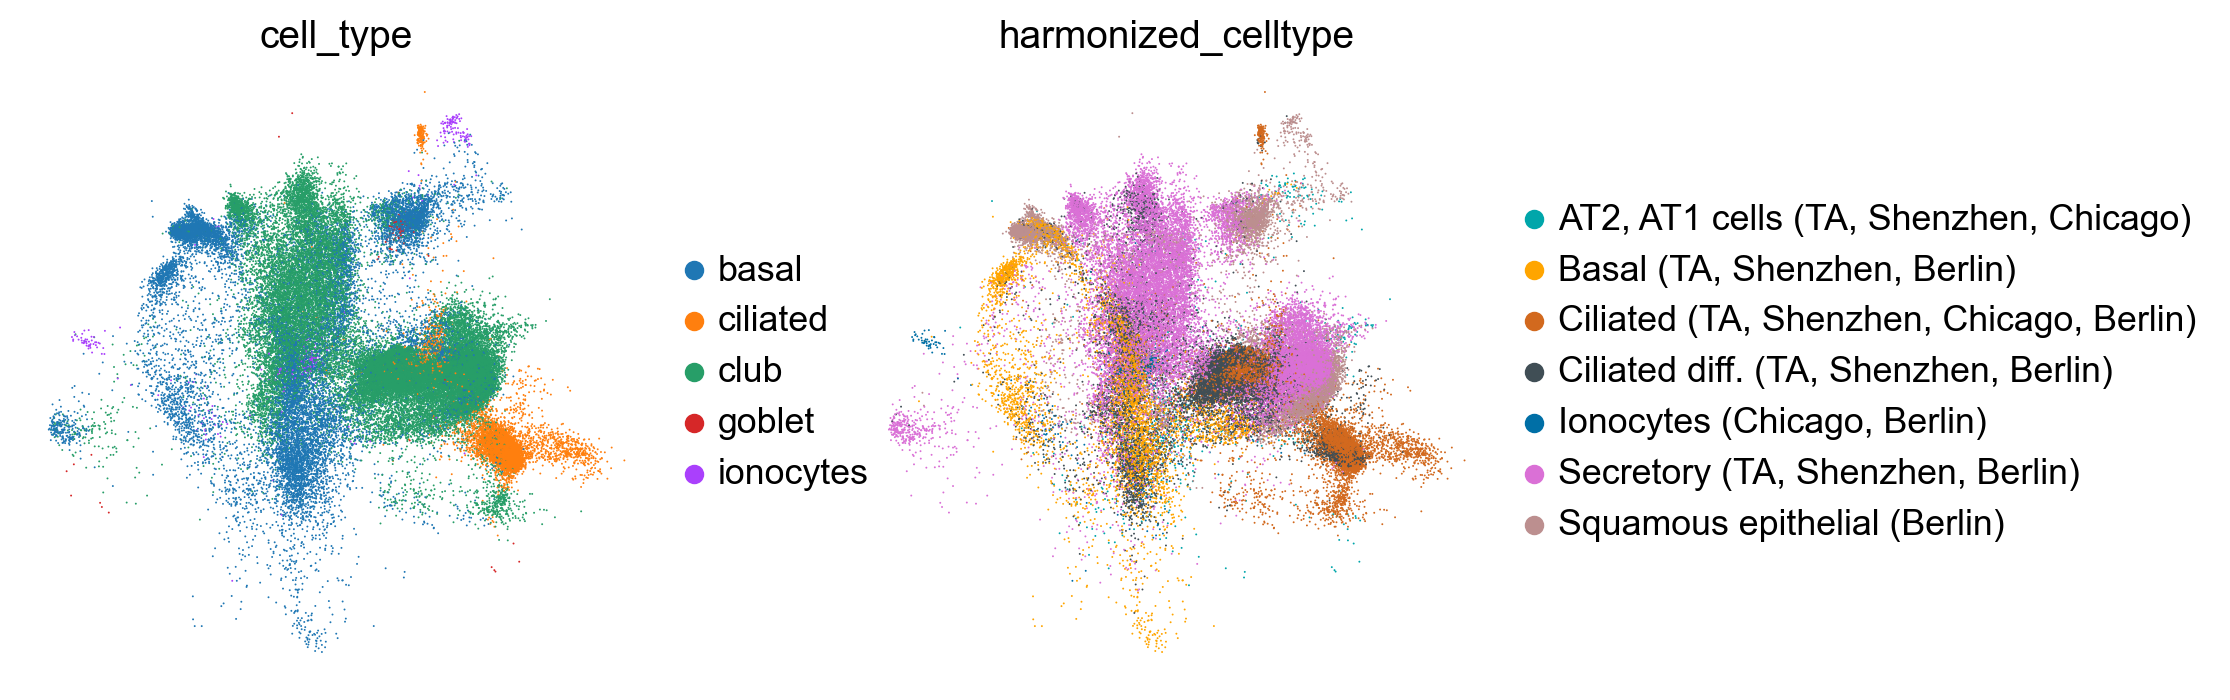

In [43]:
sc.pl.umap(fischer, color=['cell_type', 'harmonized_celltype'])

In [42]:
adata_concat = adata.concatenate(fischer, batch_categories=['ref', 'new'])

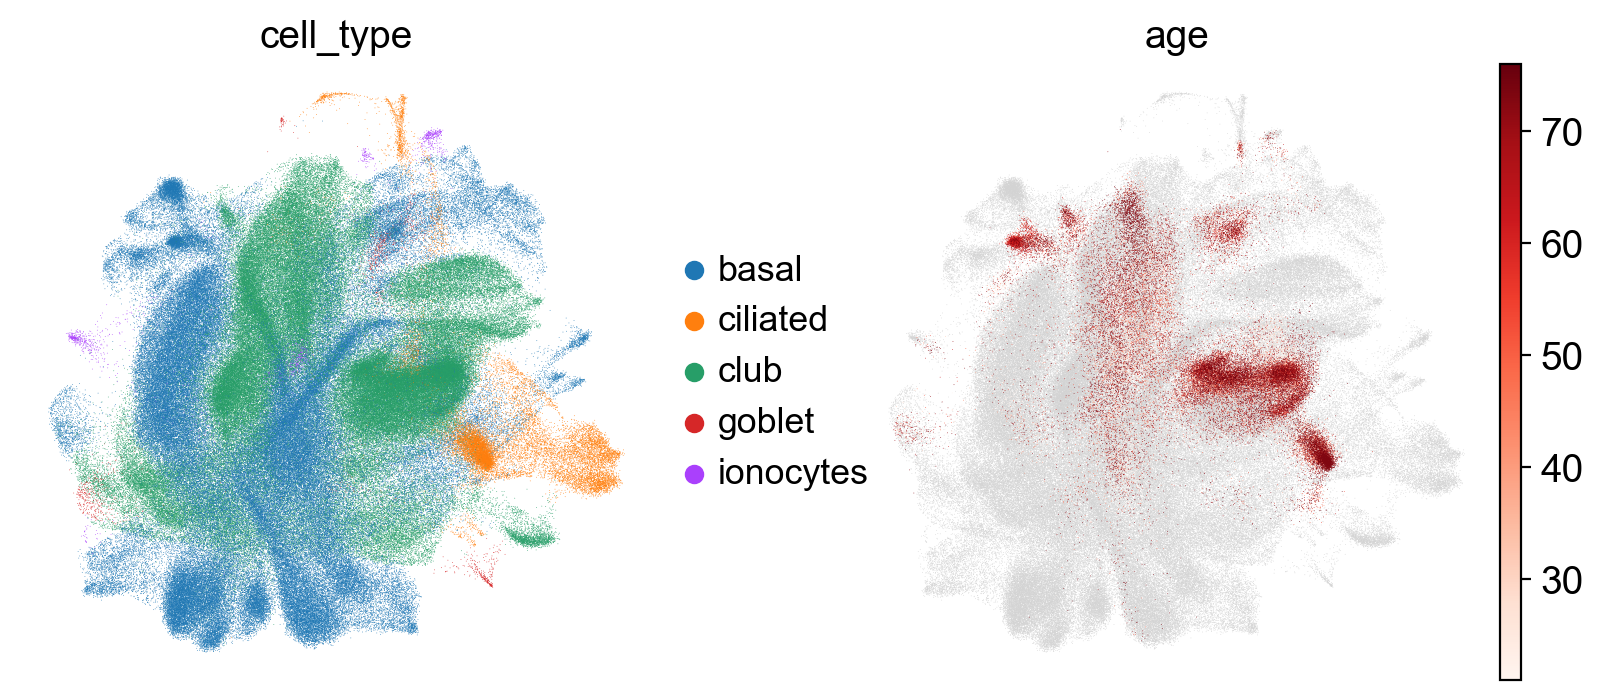

In [44]:
sc.pl.umap(adata_concat, color=['cell_type', 'age'])